In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

# df_train

In [11]:
train = pd.read_csv('./input/train.csv')
print("train.shape:", train.shape)
train.head()

train.shape: (50272, 2)


,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,NaN
2,0002cc93b.jpg_3,NaN
3,0002cc93b.jpg_4,NaN
4,00031f466.jpg_1,NaN


In [12]:
train['ImageId'] = train['ImageId_ClassId'].str[:-2]
train['ClassId'] = train['ImageId_ClassId'].str[-1:]
train['defect'] = train['EncodedPixels'].notnull()

train = train[['ImageId','ClassId','defect','EncodedPixels']]
train.head()

,ImageId,ClassId,defect,EncodedPixels
0,0002cc93b.jpg,1,True,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg,2,False,NaN
2,0002cc93b.jpg,3,False,NaN
3,0002cc93b.jpg,4,False,NaN
4,00031f466.jpg,1,False,NaN


## 1) Masks Distribution

True     43177
False     7095
Name: EncodedPixels, dtype: int64
Ratio (hasMask/Total): 0.14113224061107574


Text(0, 0.5, 'No. of masks')

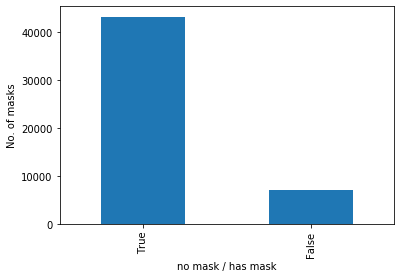

In [30]:
print(train['EncodedPixels'].isnull().value_counts())
print('Ratio (hasMask/Total):', train['EncodedPixels'].count()/train['EncodedPixels'].isnull().count())

train['EncodedPixels'].isnull().value_counts().plot(kind='bar')
plt.xlabel("no mask / has mask")
plt.ylabel("No. of masks")

-----------------------------------------------------------------------------------------------------

In [35]:
train1 = train.groupby(by='ImageId', axis=0).agg({'defect':'sum'})
train1.rename(columns={'defect': 'num_defects'}, inplace=True)
train1['num_defects'] = train1['num_defects'].astype(np.int32)

print('There are {} train_images in total'.format(train1.shape[0]))
print('train1.shape:', train1.shape)
train1.head()

There are 12568 train_images in total
train1.shape: (12568, 1)


,num_defects
ImageId,
0002cc93b.jpg,1
00031f466.jpg,0
000418bfc.jpg,0
000789191.jpg,0
0007a71bf.jpg,1


## 2) No. of image with 0/1/2/3/4 masks (Masks Distribution)

1    6239
0    5902
2     425
3       2
Name: num_defects, dtype: int64
Ratio (has0Mask/Total): 0.4696053469127944
Ratio (has1Mask/Total): 0.4964194780394653
Ratio (has2Mask/Total): 0.03381604073838319


Text(0, 0.5, 'No. of images')

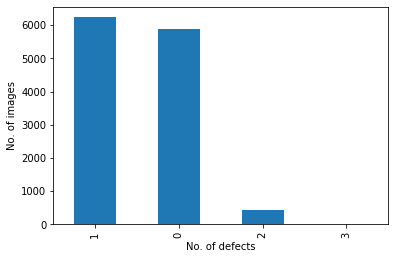

In [69]:
print(train1['num_defects'].value_counts())
print('Ratio (has0Mask/Total):', train1['num_defects'].value_counts()[0]/train1['num_defects'].count())
print('Ratio (has1Mask/Total):', train1['num_defects'].value_counts()[1]/train1['num_defects'].count())
print('Ratio (has2Mask/Total):', train1['num_defects'].value_counts()[2]/train1['num_defects'].count())

train1['num_defects'].value_counts().plot(kind='bar')
plt.xlabel("No. of defects")
plt.ylabel("No. of images")

-----------------------------------------------------------------------------------------------------

In [54]:
train2 = train[train['defect']==True]

In [55]:
print('There are {} defects in total.'.format(train2.shape[0]))
print('train.shape:', train2.shape)
train2.head()

There are 7095 defects in total.
train.shape: (7095, 4)


,ImageId,ClassId,defect,EncodedPixels
0,0002cc93b.jpg,1,True,29102 12 29346 24 29602 24 29858 24 30114 24 3...
18,0007a71bf.jpg,3,True,18661 28 18863 82 19091 110 19347 110 19603 11...
20,000a4bcdd.jpg,1,True,37607 3 37858 8 38108 14 38359 20 38610 25 388...
27,000f6bf48.jpg,4,True,131973 1 132228 4 132483 6 132738 8 132993 11 ...
30,0014fce06.jpg,3,True,229501 11 229741 33 229981 55 230221 77 230468...


## 3) No. of images for each Class (Class Distribution with masks)

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64
Ratio (Class3/Total): 0.7258632840028189
Ratio (Class1/Total): 0.12642706131078224
Ratio (Class4/Total): 0.11289640591966173
Ratio (Class2/Total): 0.03481324876673714


Text(0, 0.5, 'No. of images')

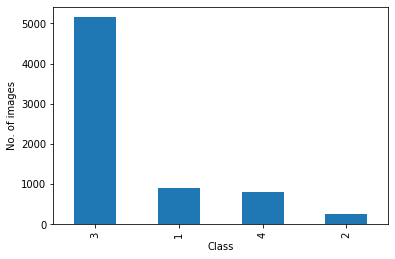

In [66]:
print(train2['ClassId'].value_counts())
print('Ratio (Class3/Total):', train2['ClassId'].value_counts()[0]/train2['ClassId'].count())
print('Ratio (Class1/Total):', train2['ClassId'].value_counts()[1]/train2['ClassId'].count())
print('Ratio (Class4/Total):', train2['ClassId'].value_counts()[2]/train2['ClassId'].count())
print('Ratio (Class2/Total):', train2['ClassId'].value_counts()[3]/train2['ClassId'].count())

train2['ClassId'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("No. of images")

# df_result

In [2]:
submission = pd.read_csv('./output/submission_step2_gray.csv')

print("submission.shape:", submission.shape)
submission.head(16)

submission.shape: (7204, 2)


,ImageId_ClassId,EncodedPixels
0,004f40c73.jpg_1,NaN
1,004f40c73.jpg_2,NaN
2,004f40c73.jpg_3,NaN
3,004f40c73.jpg_4,NaN
4,006f39c41.jpg_1,NaN
5,006f39c41.jpg_2,NaN
6,006f39c41.jpg_3,NaN
7,006f39c41.jpg_4,NaN
8,00b7fb703.jpg_1,NaN
9,00b7fb703.jpg_2,NaN


In [14]:
submission['ImageId'] = submission['ImageId_ClassId'].str[:-2]
submission['ClassId'] = submission['ImageId_ClassId'].str[-1:]
submission['defect'] =submission['EncodedPixels'].notnull()

submission = submission[['ImageId_ClassId','ImageId','ClassId','defect','EncodedPixels']]
submission.head(16)

,ImageId_ClassId,ImageId,ClassId,defect,EncodedPixels
0,004f40c73.jpg_1,004f40c73.jpg,1,False,NaN
1,004f40c73.jpg_2,004f40c73.jpg,2,False,NaN
2,004f40c73.jpg_3,004f40c73.jpg,3,False,NaN
3,004f40c73.jpg_4,004f40c73.jpg,4,False,NaN
4,006f39c41.jpg_1,006f39c41.jpg,1,False,NaN
5,006f39c41.jpg_2,006f39c41.jpg,2,False,NaN
6,006f39c41.jpg_3,006f39c41.jpg,3,False,NaN
7,006f39c41.jpg_4,006f39c41.jpg,4,False,NaN
8,00b7fb703.jpg_1,00b7fb703.jpg,1,False,NaN
9,00b7fb703.jpg_2,00b7fb703.jpg,2,False,NaN


## 1) Masks Distribution

True     6244
False     960
Name: EncodedPixels, dtype: int64
Ratio (hasMask/Total): 0.13325930038867295


Text(0, 0.5, 'No. of masks')

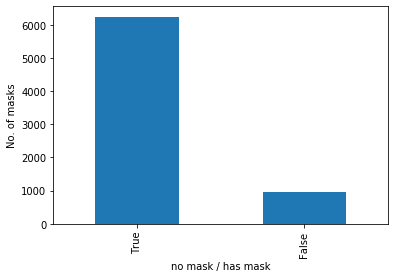

In [31]:
print(submission['EncodedPixels'].isnull().value_counts())
print('Ratio (hasMask/Total):', submission['EncodedPixels'].count()/submission['EncodedPixels'].isnull().count())

submission['EncodedPixels'].isnull().value_counts().plot(kind='bar')
plt.xlabel("no mask / has mask")
plt.ylabel("No. of masks")

Quite similar. Look good.

-----------------------------------------------------------------------------------------------------

In [42]:
submission1 = submission.groupby(by='ImageId', axis=0).agg({'defect':'sum'})
submission1.rename(columns={'defect': 'num_defects'}, inplace=True)
submission1['num_defects'] = submission1['num_defects'].astype(np.int32)

print('There are {} submission_images in total'.format(submission1.shape[0]))
print('submission1.shape:', submission1.shape)
submission1.head()

There are 1801 submission_images in total
submission1.shape: (1801, 1)


,num_defects
ImageId,
004f40c73.jpg,0
006f39c41.jpg,0
00b7fb703.jpg,1
00bbcd9af.jpg,2
0108ce457.jpg,0


## 2) No. of image with 0/1/2/3/4 masks

0    1040
1     566
2     191
3       4
Name: num_defects, dtype: int64
Ratio (has0Mask/Total): 0.5774569683509162
Ratio (has1Mask/Total): 0.31426985008328706
Ratio (has2Mask/Total): 0.10605219322598557


Text(0, 0.5, 'No. of images')

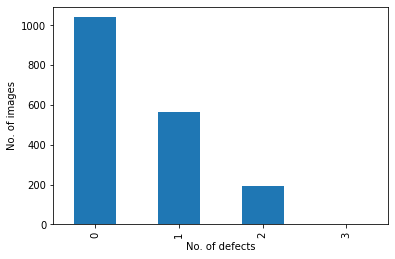

In [68]:
print(submission1['num_defects'].value_counts())
print('Ratio (has0Mask/Total):', submission1['num_defects'].value_counts()[0]/submission1['num_defects'].count())
print('Ratio (has1Mask/Total):', submission1['num_defects'].value_counts()[1]/submission1['num_defects'].count())
print('Ratio (has2Mask/Total):', submission1['num_defects'].value_counts()[2]/submission1['num_defects'].count())

submission1['num_defects'].value_counts().plot(kind='bar')
plt.xlabel("No. of defects")
plt.ylabel("No. of images")

Not good. Images with 1 mask are fewer while images with 0&2 mask are more.
#### It shows that there is a huge error in step1 (binary classification - hasmask/nomask)

-----------------------------------------------------------------------------------------------------

In [62]:
submission2 = submission[submission['defect']==True]

In [64]:
print('There are {} masks in total.'.format(submission2.shape[0]))
print('submission.shape:', submission2.shape)
submission2.head()

There are 960 masks in total.
submission.shape: (960, 5)


,ImageId_ClassId,ImageId,ClassId,defect,EncodedPixels
10,00b7fb703.jpg_3,00b7fb703.jpg,3,True,3341 63 3405 1 3592 146 3739 11 3848 172 4105 ...
14,00bbcd9af.jpg_3,00bbcd9af.jpg,3,True,24956 3 24961 1 24963 125 25189 155 25431 169 ...
15,00bbcd9af.jpg_4,00bbcd9af.jpg,4,True,48597 2 48851 4 48864 4 48869 3 48873 1 49106 ...
22,0109b68ec.jpg_3,0109b68ec.jpg,3,True,5978 1 5980 1 5982 1 5990 3 5994 1 6231 4 6236...
23,0109b68ec.jpg_4,0109b68ec.jpg,4,True,24012 11 24252 41 24505 1 24507 59 24759 73 25...


## 3) No. of images for each Class (Class Distribution with masks)

3    639
1    201
4    120
Name: ClassId, dtype: int64
Ratio (Class3/Total): 0.665625
Ratio (Class1/Total): 0.209375
Ratio (Class4/Total): 0.125


Text(0, 0.5, 'No. of images')

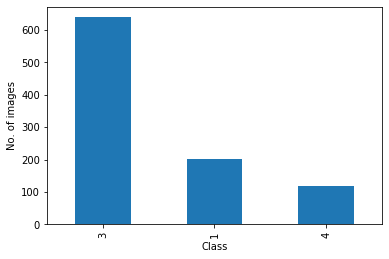

In [67]:
print(submission2['ClassId'].value_counts())
print('Ratio (Class3/Total):', submission2['ClassId'].value_counts()[0]/submission2['ClassId'].count())
print('Ratio (Class1/Total):', submission2['ClassId'].value_counts()[1]/submission2['ClassId'].count())
print('Ratio (Class4/Total):', submission2['ClassId'].value_counts()[2]/submission2['ClassId'].count())

submission2['ClassId'].value_counts().plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("No. of images")

Not quite good. Class1 is more while Class3 is fewer here.

Class4 is fine. No Class2 because there are too few class2 masks in training set. So it is acceptable.
    
#### It shows that there is an error (Class mispredict problem) in step2